<a href="https://colab.research.google.com/github/fernandoescobosa/data_science/blob/main/Analisando_os_Dados_do_Airbnb_Montreal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *Montreal*

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

O [Airbnb](https://www.airbnb.com.br/), startup fundada em 2008, tem como objetivo conectar pessoas que querem viajar e se hospedar com anfitriões que queiram alugar seus imóveis. Air, Bed and Breakfast são as palavras que juntas compõem seu nome. 

Trazendo a simplicidade e a praticidade, até o fim de 2020 o Airbnb já havia hospedado mais de **800 milhões de pessoas** ao redor do mundo, dentre os mais de **220 países e regiões** que utilizam seu serviço. Além disso, já possuía mais de **4 milhões de anfitriões** que anunciavam, gratuitamente, seus imóveis e acomodações.

Uma das iniciativas do Airbnb é disponibilizar dados do site para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


<center><img alt="Montreal" width="60%" src="https://etacanadavisa.com.br/main/wp-content/uploads/2019/04//1556403596_image2-830x381.jpg"></center>

**Neste *notebook* iremos analisar os dados referentes à cidade Montreal, no Canadá, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Um pouco sobre Montreal

Montreal é a maior cidade da província de Québec e a segunda mais populosa do Canadá. Seu nome é uma homenagem ao Monte Royal, localizado no centro da cidade dentro do Parque Mont Royal. 

O idioma oficial da cidade é o francês, o que a faz ser a segunda maior cidade francófona do mundo, ficando atrás apenas de Paris. Entretanto, boa parte da população também sabe o inglês e alguns bairros até possuem esta última como língua predominante. Juntamente com o fato de possuir renomadas Universidades, como a McGill University, estes são fatores que colaboram para que Montreal seja uma cidade bastante procurada por estudantes em busca de intercâmbio.

Trazendo um grande contexto histórico, como por exemplo o de ter sido até 1970 a capital comercial do país, quando foi ultrapassada por Toronto, Montreal possui diversos pontos turísticos para os mais variados gostos. Além do já citado Monte Royal, podemos também pontuar a região de Old Montréal, com construções que datam dos séculos 17, 18 e 19 e atrações como a Basílica de Notre-Dame e o Old Port. O parque Jean Drapeau, o Jardim Botânico, a Praça das Artes e muitos outros pontos turísticos repletos de exposições, festivais e atividades tornam a cidade excelente destino para qualquer viajante.

<center><img alt="Basílica de Notre Dame" width="40%" src="https://media2.trover.com/T/5930d972ad412a1812001157/fixedw.jpg"></center>

Ao analisar os dados do Airbnb em Montreal vale a pena levar em consideração o contexto das dificuldades que a cidade enfrenta com relação à plataforma, como por exemplo: condomínios com mais de 20% dos imóveis alugados via Airbnb pelos seus hóspedes, a queda no mercado de aluguéis e as chamadas party houses. Por estes e outros motivos, medidas foram tomadas pelo governo local como um processo de registro para obtenção de permissão para alugar pelo Airbnb por menos de 31 dias, aprovação de donos de condomínios e a restrição em bairros de grande concentração como Ville-Marie e Plateau-Mont-Royal em que só se poderia haver listagens do Airbnb em determinadas zonas.

Para começar nossa análise vale um último comentário que nos indica a importância de estudar os dados desta cidade em específico: Apesar das regras citadas acima, dentre outras, de 10 dos bairros de maior concentração de aluguéis pelo Airbnb no Canadá, 5 se encontram em Montreal.


## Obtenção dos Dados

Começaremos importanto as bibliotecas que serão utilizadas para o desenvolvimento deste projeto

* [**pandas**](https://pandas.pydata.org/): ferramenta open source para manipulação e análise de dados
* [**matplotlib**](https://matplotlib.org/): biblioteca para a criação de visualizações estáticas, animadas e interativas em Python.
* [**seaborn**](https://seaborn.pydata.org/): biblioteca que fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos, baseada em matplotlib.

Os dados utilizados neste projeto foram obtidos em [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Mais precisamente, utilizaremos os dados listings.csv de Montreal que contém informações resumidas e métricas para listagens.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("http://data.insideairbnb.com/canada/qc/montreal/2020-12-18/visualisations/listings.csv")

A partir destes dados vamos tentar responder à algumas perguntas:

1. Qual é a média de preços para a cidade de Montreal?
2. Existe alguma relação entre as variáveis?
3. Qual o tipo de imóvel mais alugado no Airbnb?
4. Qual é o bairro ou localidade mais caro? 
5. Existem anfitriões com muitas propriedades?



## Análise Exploratória
Iniciaremos agora a etapa de analise exploratória. Antes de qualquer coisa, precisamos ententer como os dados estão estruturados, e para isso criaremos um dicionário das variáveis.

**Dicionário das variáveis**

* id - número de id usado para identificar o imóvel
* name - nome do imóvel no anúncio
* host_id - número de id usado para identificar o anfitrião
* host_name - nome do anfitrião
* neighbourhood_group - apenas valores ausentes
* neighbourhood - nome do bairro
* latitude - coordenada da latitude
* longitude - coordenada da longitude
* room_type - tipo de dormitório, como por exemplo quarto privado ou casa inteira
* price - preço
* minimum_nights - mínimo de noites para hospedagem
* number_of_reviews - número de reviews que o imóvel já recebeu
* last_review - data da última review que o imóvel recebeu
* reviews_per_month - média de reviews recebidas por mês
* calculated_host_listings_count - número de imóveis que o mesmo anfitrião possui
* availability_365 - número de dias disponiveis dentro do período de 365 dias

Vamos dar uma olhada nas primeiras 5 entradas do nosso conjunto de dados, ou *dataset*.

In [3]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2078,Central comfy close to Metro Laurie,2277,Nelia,NaN,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room,38,2,245,2018-09-23,2.16,1,0
1,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51939,-73.56482,Entire home/apt,169,2,330,2020-10-27,2.58,2,350
2,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51929,-73.56493,Entire home/apt,248,3,69,2020-11-01,0.64,2,348
3,31847,Downtown/Airport room,2319,Gail,NaN,Le Sud-Ouest,45.48467,-73.57995,Private room,40,2,153,2020-01-07,1.19,5,0
4,34715,Chez Patrac ! Métro Beaubien,149769,Alain,NaN,Rosemont-La Petite-Patrie,45.53840,-73.60355,Entire home/apt,135,4,4,2011-09-12,0.03,1,358


### **Volume dos dados e tipos das variáveis** 

Um primeiro passo para a análise de dados é verificar o número de entradas e variáveis, além de tomarmos ciência do tipo de cada uma das variáveis.

Temos dois pontos que podemos observar com relação ao tipo das variáveis: 
* *price* é do tipo int, e portanto quando trabalharmos com esta variável não precisaremos nos preocupar em convertê-la;
* *last_review* é do tipo object (string), e não datetime.

In [4]:
print("Entradas: {}".format(df.shape[0]))
print("Variáveis: {}".format(df.shape[1]))

display(df.dtypes)


Entradas: 13767
Variáveis: 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Valores ausentes no *dataset***

Se olharmos as 5 primeiras entradas do dataset, notamos que existem entradas com NaN, o que denota valores que estão faltando. Fazendo uma análise em busca de todos os valores ausentes, chegamos às seguintes conclusões:
* *neighbourhood_group* não possui valor algum;
* *reviews_per_month* e *last_review* possuem 23.5% dos valores ausentes;
* *name* e *host_name* possuem menos de 0.1% de valores faltando.


In [5]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.235491
last_review                       0.235491
name                              0.000581
host_name                         0.000218
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Entendendo as variáveis** 
Para entender um pouco mais das variáveis, vamos verificar as suas distribuições plotando histogramas para as variáveis numéricas. Desta forma já temos indícios de que existem valores atípicos para as variáveis *price* e *minimum_nights*.


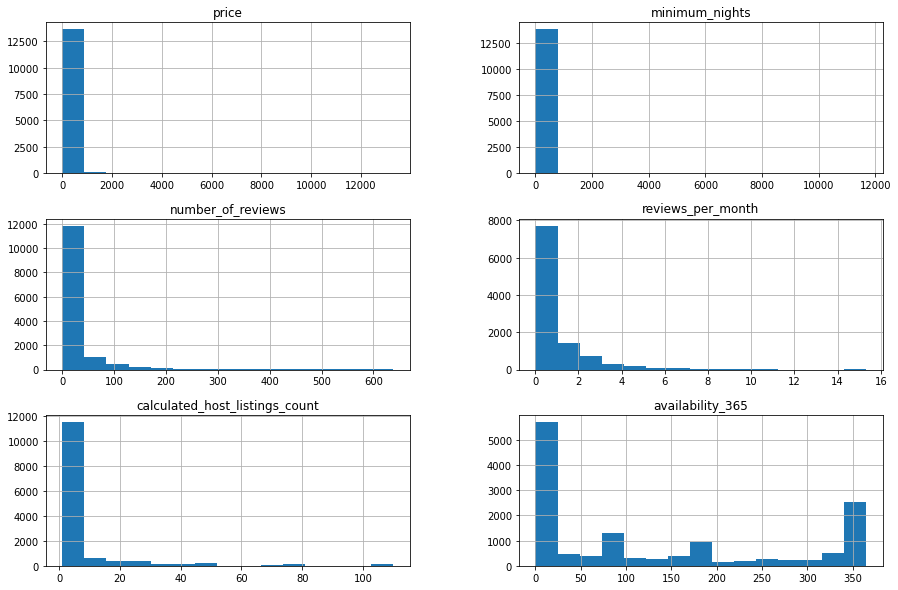

In [6]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].hist(bins=15, 
                                                                figsize=(15,10));

### **Existência de outliers**

Com o auxílio do resumo estatístico abaixo, podemos verificar a existência de outliers nos dados:
* a variável *price* possui um valor mínimo de 0, e apesar de 75% dos valores estarem abaixo de 120, possui um valor máximo de 13294;
* a variável *minimum_nights* possui um valor máximo de 11684, o que ultrapassa os 365 dias do ano.

A partir de gráficos box-plot é possivel confirmar estas hipóteses. Mais a frente, limparemos os dados excluindo estes outliers.

Ao plotar gráficos Box-plot para as variáveis *number_of_reviews* e *reviews_per_month*, também verificamos a existência de valores exteriores, porém que não consideraremos como outliers, pois um imóvel cadastrado à mais tempo na plataforma, ou que possui alta demanda, tende a ter valores discrepantes.

In [7]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,13767.000000,13767.000000,13767.000000,10525.000000,13767.000000,13767.000000
mean,118.505339,14.112298,20.986562,0.891945,7.091668,130.273698
std,288.931405,107.392973,45.494290,1.247030,15.805663,142.181803
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,49.000000,1.000000,1.000000,0.130000,1.000000,0.000000
50%,78.000000,2.000000,4.000000,0.380000,1.000000,85.000000
75%,120.000000,8.500000,19.000000,1.120000,4.000000,269.000000
max,13294.000000,11684.000000,638.000000,15.330000,110.000000,365.000000


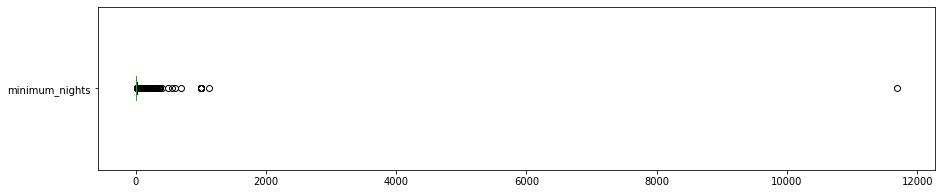

Outliers possuem valores de 'minimum_nights' acima de 32:
541 entradas
3.9297%


In [8]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

q1_nights = df.minimum_nights.quantile(0.25)
q3_nights = df.minimum_nights.quantile(0.75)
limite_superior_minimum_nights = q3_nights + 1.5*(q3_nights - q1_nights)

num_outiliers_minimum_nights = len(df[df.minimum_nights > 
                                          32])

print(f"Outliers possuem valores de 'minimum_nights' acima de {32}:")
print(f"{num_outiliers_minimum_nights} entradas")
print(f'{num_outiliers_minimum_nights / df.shape[0]*100:.4f}%')

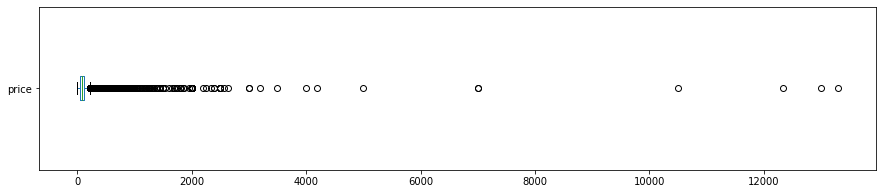

Outliers possuem valores de 'price' acima de 226.5:
998 entradas
7.2492%


In [9]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

q1_price = df.price.quantile(0.25)
q3_price = df.price.quantile(0.75)
limite_superior_price = q3_price + 1.5*(q3_price - q1_price)

num_outiliers_price = len(df[df.price > limite_superior_price])

print(f"Outliers possuem valores de 'price' acima de {limite_superior_price}:")
print(f"{num_outiliers_price} entradas")
print(f'{num_outiliers_price / df.shape[0]*100:.4f}%')

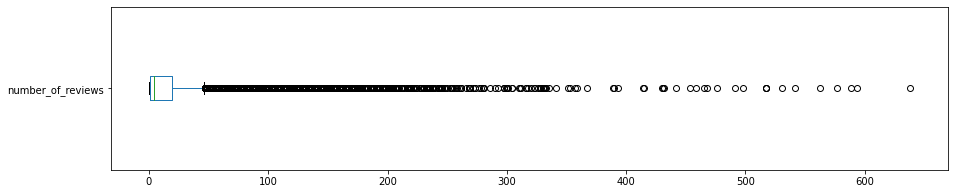

Outliers possuem valores de 'number_of_reviews' acima de 46.0:
1762 entradas
12.7987%


In [10]:
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

q1_number_of_reviews = df.number_of_reviews.quantile(0.25)
q3_number_of_reviews = df.number_of_reviews.quantile(0.75)
limite_superior_number_of_reviews = q3_number_of_reviews + 1.5*(q3_number_of_reviews - q1_number_of_reviews)

num_outiliers_number_of_reviews = len(df[df.number_of_reviews > limite_superior_number_of_reviews])

print(f"Outliers possuem valores de 'number_of_reviews' acima de {limite_superior_number_of_reviews}:")
print(f"{num_outiliers_number_of_reviews} entradas")
print(f'{num_outiliers_number_of_reviews / df.shape[0]*100:.4f}%')

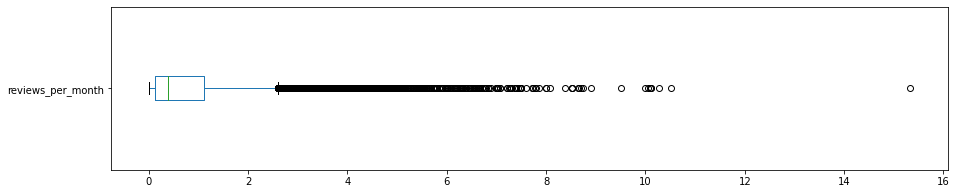

Outliers possuem valores de 'reviews_per_month' acima de 2.6050000000000004:
940 entradas
6.8279%


In [11]:
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

q1_reviews_per_month = df.reviews_per_month.quantile(0.25)
q3_reviews_per_month = df.reviews_per_month.quantile(0.75)
limite_superior_reviews_per_month = q3_reviews_per_month + 1.5*(q3_reviews_per_month - q1_reviews_per_month)

num_outiliers_reviews_per_month = len(df[df.reviews_per_month > limite_superior_reviews_per_month])

print(f"Outliers possuem valores de 'reviews_per_month' acima de {limite_superior_reviews_per_month}:")
print(f"{num_outiliers_reviews_per_month} entradas")
print(f'{num_outiliers_reviews_per_month / df.shape[0]*100:.4f}%')

### **Limpando os dados**
Neste momento iremos remover outliers e plotar novamente gráficos, o que nos dará uma noção melhor da distribuição de preços e mínimo de noites.

Com relação à variável *minimum_nights*, existe um acúmulo de propriedades com valores entre 30 e 32. Isto pode ser devido, por exemplo, ao fato de existirem imóveis destinados a locação por temporada ou para estudantes de intercâmbio, ou ainda pela necessidade de uma permissão para que o anfitrião possa alugar por menos de 31 noites. Por estes motivos, consideramos como outliers valores acima de 32.

Para a variável *price*, vamos admitir como válidos apenas valores para estas variáveis que estão abaixo de $$Q3 + 1.5(Q3 - Q1)$$
na qual Q1 e Q3 denotam primeiro e terceiro quantis, respectivamente. Além disso removeremos também os valores nulos.

Após a limpeza, já vemos que o preço máximo é de 226, um valor bem mais aceitável.

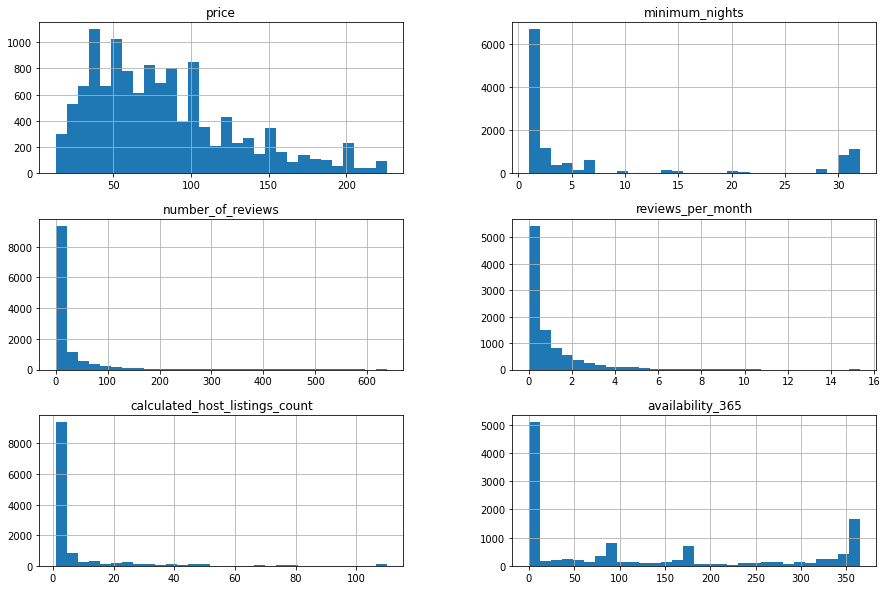

In [12]:
# removendo os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.minimum_nights > 32].index,
              axis=0,
              inplace=True)
df_clean.drop(df_clean[df_clean.price > limite_superior_price].index,
              axis=0,
              inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index,
              axis=0,
              inplace=True)


# removendo 'neighbourhood_group'
df_clean.drop('neighbourhood_group',
              axis=1,
              inplace=True)

# plotando o histograma para as variáveis numéricas
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].hist(bins=30, figsize=(15,10))
plt.show()

In [13]:
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,12261.000000,12261.000000,12261.000000,9562.000000,12261.000000,12261.000000
mean,82.251692,7.969252,21.579398,0.909693,7.136694,124.205693
std,46.517535,10.966936,46.541605,1.269415,16.077669,140.330981
min,13.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,45.000000,1.000000,1.000000,0.130000,1.000000,0.000000
50%,74.000000,2.000000,4.000000,0.390000,1.000000,75.000000
75%,105.000000,7.000000,19.000000,1.140000,4.000000,255.000000
max,226.000000,32.000000,638.000000,15.330000,110.000000,365.000000


### **Qual é a média de preços para a cidade de Montreal?**

Agora podemos calcular a média de preços de uma diária! Porém, saber que a média é 83.14 dólares canadenses, não nos diz muito sobre a localização e tipo dos imóveis e seus valores. A seguir faremos uma análise mais apurada neste sentido.


In [14]:
# ver a média da coluna `price``
df_clean.price.mean()

82.25169235788272

### **Existe alguma relação entre as variáveis?**

Correlação é uma ferramenta estatistica utilizada para verificar se existe uma relação linear entre duas variáveis, atribuindo um número real de -1 à 1, chamado de coeficiente de correlação, de maneira que -1 e 1 significam que as variáveis são perfeitamente correlacionadas e 0 siginifica que não existe correlação.

Verificamos desta forma que as únicas variáveis númericas possivelmente correlacionadas são *reviews_per_month* e *number_of_reviews*, com coeficiente de correlação 0.75, o que faz total sentido considerando que imoveis com uma maior taxa de reviews tende a ter um maior número.

In [15]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.030781,0.055397,0.051930,0.106318,0.111511
minimum_nights,-0.030781,1.000000,-0.035260,-0.096809,0.262352,0.195773
number_of_reviews,0.055397,-0.035260,1.000000,0.758883,-0.018807,0.088296
reviews_per_month,0.051930,-0.096809,0.758883,1.000000,0.054362,0.115649
calculated_host_listings_count,0.106318,0.262352,-0.018807,0.054362,1.000000,0.205339
availability_365,0.111511,0.195773,0.088296,0.115649,0.205339,1.000000


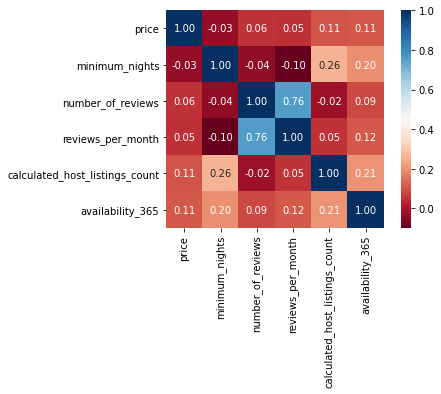

In [16]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Qual o tipo de imóvel mais alugado no Airbnb?**

Com relação ao tipo de quarto, temos 4 categorias, de forma que casas ou apartamentos inteiros e quartos privados são predominantes, com aproximadamente 66.46% e 32% do total.

Podemos verificar tambem que quartos privados possui uma média de valor bem abaixo da média total, e casas ou apartamentos inteiros um pouco acima.

In [17]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    8513
Private room       3590
Shared room         104
Hotel room           54
Name: room_type, dtype: int64

In [18]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() /df_clean.shape[0]

Entire home/apt    0.694315
Private room       0.292798
Shared room        0.008482
Hotel room         0.004404
Name: room_type, dtype: float64

In [19]:
tipo_de_quarto = df_clean.groupby(['room_type']).price.mean()
tipo_de_quarto

room_type
Entire home/apt     95.920944
Hotel room         111.907407
Private room        50.489415
Shared room         44.355769
Name: price, dtype: float64

### **Qual é o bairro ou localidade mais caro?**

Naturalmente nos perguntamos qual a região mais cara. Dito isto, fazendo uma análise do preço médio e do número de imóveis de cada bairro, vemos que alguns valores atrapalham a nossa análise. Por exemplo, o bairro *Kirkland* é a localidade mais cara em média, com apenas 5 imóveis, e *Montréal-Est* é o segundo mais caro, que possui apenas 3 imóveis.

In [20]:
# ver preços por bairros, na média
preco_medio_por_distrito = df_clean.groupby(['neighbourhood']).price.mean()
preco_medio_por_distrito.sort_values(ascending=False)[:10]

neighbourhood
Kirkland               123.400000
Montréal-Est           107.000000
Côte-Saint-Luc         105.105263
Hampstead               99.500000
Westmount               98.256757
Le Sud-Ouest            91.410419
Ville-Marie             90.514269
Outremont               87.992593
Pierrefonds-Roxboro     87.756098
Montréal-Ouest          86.800000
Name: price, dtype: float64

In [21]:
# número de imóveis por bairro
num_imoveis_por_distrito = df_clean.groupby(['neighbourhood']).name.count()
num_imoveis_por_distrito.sort_values(ascending=False)

neighbourhood
Ville-Marie                                 3329
Le Plateau-Mont-Royal                       3145
Rosemont-La Petite-Patrie                   1204
Côte-des-Neiges-Notre-Dame-de-Grâce          940
Le Sud-Ouest                                 787
Mercier-Hochelaga-Maisonneuve                661
Villeray-Saint-Michel-Parc-Extension         635
Verdun                                       287
Ahuntsic-Cartierville                        246
Saint-Laurent                                139
Outremont                                    135
LaSalle                                      110
Westmount                                     74
Lachine                                       68
Saint-Léonard                                 58
Montréal-Nord                                 58
Rivière-des-Prairies-Pointe-aux-Trembles      57
Anjou                                         46
Pointe-Claire                                 42
Pierrefonds-Roxboro                           41
Côte-S

Utilizando um gráfico de dispersão, vemos que a maioria dos imóveis estão localizados na região central de Montreal. Além disso, os dois barros comentados acima estão mais afastados, o que nos sugere a necessidade de uma análise mais apurada.

Para isto, dividiremos os bairros em 3 classes diferentes com relação à quantidade de propriedades: Até 10, de 11 a 50 e acima de 50.

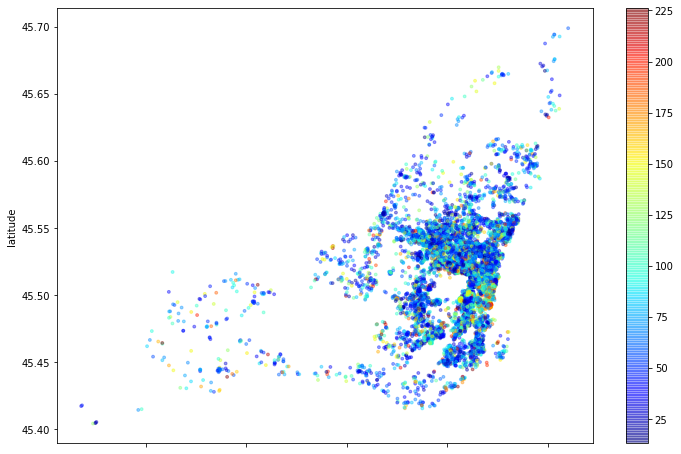

In [22]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'],
              s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

In [23]:
bairros = pd.DataFrame(data={'name' : preco_medio_por_distrito.index, 
                               'neighbourhood_mean_price' : preco_medio_por_distrito.values, 
                               'number_of_properties' : num_imoveis_por_distrito.values})

bairros_ate_10 = bairros.copy()
bairros_ate_10.drop(bairros[bairros.number_of_properties > 10].index,
              axis=0,
              inplace=True)

bairros_10_a_50 = bairros.copy()
bairros_10_a_50.drop(bairros[bairros.number_of_properties <= 10].index,
              axis=0,
              inplace=True)
bairros_10_a_50.drop(bairros_10_a_50[bairros_10_a_50.number_of_properties > 50].index,
              axis=0,
              inplace=True)


bairros_acima_50 = bairros.copy()
bairros_acima_50.drop(bairros[bairros.number_of_properties <= 50].index,
              axis=0,
              inplace=True)

### Localidades com até 10 imóveis

Como já comentamos, *Kirkland*, com valor médio de 123.4 CAD, e *Montréal-Est*, com 107 CAD, são as localidades mais caras do dataset. 

Um fato importante é que estes eram municípios da cidade de Montreal que tornaram-se independentes. O primeiro se encontra na região oeste da ilha de Montreal, e o segundo, ao norte.

In [24]:
bairros_ate_10.sort_values('neighbourhood_mean_price', ascending=False)

,name,neighbourhood_mean_price,number_of_properties
9,Kirkland,123.4,5
17,Montréal-Est,107.0,3
8,Hampstead,99.5,6
19,Montréal-Ouest,86.8,10
2,Baie-d'Urfé,85.0,2
27,Sainte-Anne-de-Bellevue,46.5,4
28,Senneville,40.0,2


### Localidades com 11 à 50 imóveis

Dentre estas localidades, *Côte-Saint-Luc* é a mais cara, com valor médio de 105.10 CAD. Assim como as regiões citadas assima, *Côte-Saint-Luc* também é uma cidade independente.

A segunda mais cara desta classe é Pierrefonds-Roxboro, desta vez um bairro da cidade de Montreal, que toma o litoral norte da região oeste da ilha. Seu valor médio é 87.76 Cad, se aproximando da média da cidade.

In [25]:
bairros_10_a_50.sort_values('neighbourhood_mean_price', ascending=False)

,name,neighbourhood_mean_price,number_of_properties
4,Côte-Saint-Luc,105.105263,38
21,Pierrefonds-Roxboro,87.756098,41
16,Mont-Royal,85.968750,32
10,L'Île-Bizard-Sainte-Geneviève,84.428571,14
22,Pointe-Claire,83.476190,42
3,Beaconsfield,82.615385,13
7,Dorval,79.687500,32
6,Dollard-des-Ormeaux,76.966667,30
1,Anjou,69.978261,46


### Localidades com mais de 50 imóveis

Novamente a localidade mais cara é uma cidade independente, chamada *Westmount*, com preço médio de 98.26 CAD.	

A segunda mais cara é *Le Sud-Ouest*, bairro de Montreal que se encontra ao sul da região central. Esta é a primeira localidade que se aproxima das atrações turísticas da cidade. Seu valor médio é de 91.41 CAD.

Aqui podemos destacar a terceira e a quinta cidades mais caras, *Ville-Marie* e *Le Plateau-Mont-Royal*, com preços médios de 90.51 CAD e 83.17 CAD, respectivamente. Observe como estes valores se aproximam do valor médio da cidade. Ambas são regiões centrais, próximas ao Monte Royal, atrações turísticas e universidades. Juntas estas cidades somam 52.8% do número de propriedades totais.


In [26]:
bairros_acima_50.sort_values('neighbourhood_mean_price', ascending=False)

,name,neighbourhood_mean_price,number_of_properties
32,Westmount,98.256757,74
14,Le Sud-Ouest,91.410419,787
30,Ville-Marie,90.514269,3329
20,Outremont,87.992593,135
13,Le Plateau-Mont-Royal,83.170159,3145
26,Saint-Léonard,81.310345,58
25,Saint-Laurent,78.971429,139
24,Rosemont-La Petite-Patrie,77.393688,1204
0,Ahuntsic-Cartierville,74.195122,246
11,LaSalle,74.018182,110


In [27]:
p = (bairros_acima_50[bairros_acima_50.name == "Le Plateau-Mont-Royal"].number_of_properties.values + bairros_acima_50[bairros_acima_50.name == "Ville-Marie"].number_of_properties.values)/df_clean.shape[0]*100
print(f'Porcentagem do número de propriedades de Ville-Marie e Le Plateau-Mont-Royal juntas: {p[0]:.2f}%')

Porcentagem do número de propriedades de Ville-Marie e Le Plateau-Mont-Royal juntas: 52.80%


### **Existem anfitriões com muitas propriedades?**
Para terminar a nossa análise, podemos verificar que existe um anfitrião com 109 imóveis cadastrados no Airbnbalém de outros com mais de 50 imóveis. Isso nos indica que podem existem pessoas ou grupo utilizando o sistema do Airbnb para efetuar locações em larga escala, o que afeta de certa maneira o mercado de aluguéis da cidade.

In [28]:
hosts = df_clean.groupby(['host_id']).id.count().sort_values(ascending=False)
hosts[hosts > 1]

host_id
38459934     109
72761895      69
28047654      68
292507076     68
48013451      51
            ... 
13122099       2
136931154      2
39471384       2
140469620      2
117380294      2
Name: id, Length: 1321, dtype: int64

## Conclusões


Podemos ver que, nos restringindo aos bairros da cidade de Montreal, os mais caros se encontram na região central com destaque para *Ville-Marie* e *Le Plateau-Mont-Royal*, nos arredores do Monte Royal, próximo das principais atrações turísticas, de ruas e avenidas movimentadas com lojas e bares e universidades.

Todavia, notamos que os valores mais caros para locação do dataset são de regiões ou mais distantes do centro ou em cidades que eram municipíos de Montreal mas desde 2006 são independentes. 

Verificamos dentre os tipos de propriedades com maior disponibilidade, se encontram casas ou apartamentos inteiros e quartos privados, o primeiro custando quase o dobro do segundo.



